### Crop AVISO dataset to LBE
Data file from AVISO: 'Eddy_trajectory_nrt_3.2exp_cyclonic_20180101_20240723.nc'

Lexi Jones-Kellett

Date created: 08/06/24

Last edited: 08/07/24

In [41]:
import math, pylab, csv
import xarray as xr
import numpy as np
from datetime import datetime
from datetime import date
from itertools import groupby
from collections import Counter
from matplotlib.path import Path
import matplotlib.pyplot as plt

In [42]:
fontsize = 18

plt.rc('font', size=fontsize)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=fontsize)    # legend fontsize
plt.rc('figure', titlesize=fontsize)  # fontsize of the figure title

In [43]:
ds = xr.open_dataset('Eddy_trajectory_nrt_3.2exp_cyclonic_20180101_20240723.nc')
ds

<xarray.Dataset>
Dimensions:                        (NbSample: 20, obs: 8408689)
Dimensions without coordinates: NbSample, obs
Data variables: (12/27)
    amplitude                      (obs) float32 ...
    effective_area                 (obs) float32 ...
    effective_contour_height       (obs) float32 ...
    effective_contour_latitude     (obs, NbSample) float32 ...
    effective_contour_longitude    (obs, NbSample) float32 ...
    effective_contour_shape_error  (obs) float32 ...
    ...                             ...
    speed_contour_longitude        (obs, NbSample) float32 ...
    speed_contour_shape_error      (obs) float32 ...
    speed_radius                   (obs) float32 ...
    time                           (obs) datetime64[ns] ...
    track                          (obs) uint32 ...
    uavg_profile                   (obs, NbSample) float32 ...
Attributes: (12/19)
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    comment:                   Surface product; mesoscale eddies
    creator_email:             aviso@altimetry.fr
    creator_url:               https://www.aviso.altimetry.fr
    date_created:              2024-08-06T09:38:06Z
    framework_used:            https://github.com/AntSimi/py-eddy-tracker
    ...                        ...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   This dataset contains eddy atlas from all-sate...
    time_coverage_duration:    P2396D
    time_coverage_end:         2024-07-23T00:00:00Z
    time_coverage_start:       2018-01-01T00:00:00Z
    title:                     Mesoscale Cyclonic Eddies in Altimeter Observa...

In [44]:
lat_min,lat_max = 34.5,37
lon_min,lon_max = -73+360,-68+360

In [45]:
subset_inds = np.where(((ds.latitude > lat_min) & (ds.latitude < lat_max)) & 
                       ((ds.longitude > lon_min) & (ds.longitude < lon_max)) & 
                       ((ds.time) >= np.datetime64('2024-04-01')))[0]
print(len(subset_inds))

149


In [46]:
lat,lon,time,track = [],[],[],[]
for i in subset_inds: 
    this_track_id = int(ds.track[i].values)
    if ds.longitude[i] > 360:
        lon.append(float((ds.longitude[i] - 360).values))
    else:
        lon.append(float(ds.longitude[i].values))
    lat.append(float(ds.latitude[i].values))
    time.append(np.datetime64(ds.time[i].values))
    track.append(this_track_id)

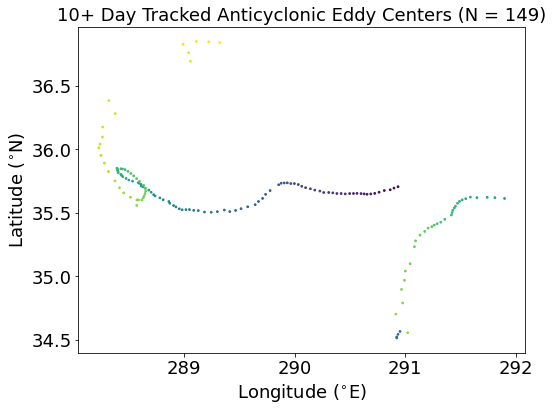

In [47]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

ax.scatter(lon,lat,s=3,c=time)
scat = ax.set_title('Eddy Centers in Box (N = %s)'%(len(track)))
ax.set_xlabel('Longitude ($^{\circ}$E)');
ax.set_ylabel('Latitude ($^{\circ}$N)');

In [48]:
np.unique(track)

array([154367, 174440, 184611])

In [49]:
subset_inds = np.where((ds.track==174440))[0]

In [50]:
lat,lon,time,track = [],[],[],[]
for i in subset_inds: 
    this_track_id = int(ds.track[i].values)
    if ds.longitude[i] > 360:
        lon.append(float((ds.longitude[i] - 360).values))
    else:
        lon.append(float(ds.longitude[i].values))
    lat.append(float(ds.latitude[i].values))
    time.append(np.datetime64(ds.time[i].values))
    track.append(this_track_id)

In [104]:
from matplotlib.colors import Normalize
import matplotlib.dates as mdates

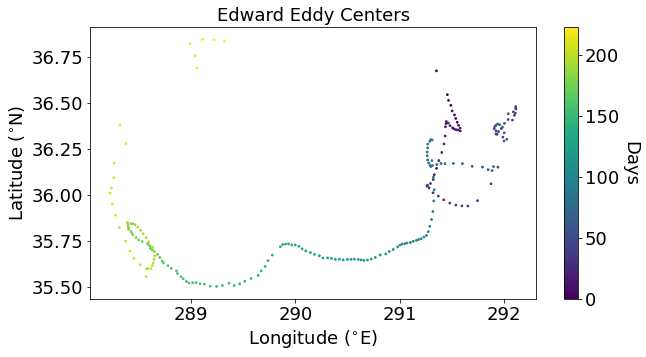

In [119]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

ax.scatter(lon,lat,s=3,c=time)
scat = ax.set_title('Edward Eddy Centers')
ax.set_xlabel('Longitude ($^{\circ}$E)');
ax.set_ylabel('Latitude ($^{\circ}$N)');

# Create a colorbar
norm = Normalize(vmin=0, vmax=len(time))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Dummy array for the colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Days', rotation=270,labelpad=20)


# Format colorbar ticks as dates
#cb.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

In [57]:
def get_eddy_by_ID_date(ds,track_id,eddy_date):
    """
    ds: netCDF AVISO format
    track_id: id of eddy to extract
    eddy_date: date in format 'YYYY-MM-DD'

    Returns contour lons, contour lats, center lon, center lat
    """
    try:
        ind = np.where((ds.track == track_id) & (ds.time == np.datetime64(eddy_date)))[0][0]
        contour_lons = np.array(ds.effective_contour_longitude[ind])
        contour_lats = np.array(ds.effective_contour_latitude[ind])
    except:
        print('No eddy data available with that request ... :(')        
    
    return contour_lons,contour_lats,ds.longitude[ind],ds.latitude[ind]

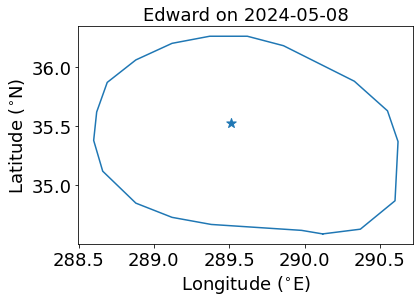

In [90]:
date_to_plot = '2024-05-08'

############################
contour_lons,contour_lats,center_lon,center_lat = get_eddy_by_ID_date(ds,174440,date_to_plot)

# Plot
plt.plot(contour_lons,contour_lats)
plt.scatter(center_lon,center_lat,marker='*',s=100)

# Labels
plt.title('Edward on %s'%(date_to_plot))
plt.xlabel('Longitude ($^{\circ}$E)');
plt.ylabel('Latitude ($^{\circ}$N)');

Test plotting first 10 days of the contour

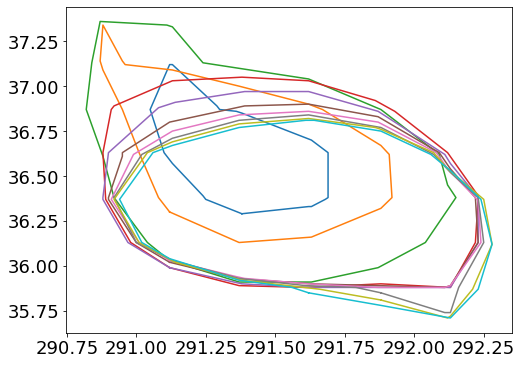

In [61]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

for t in time[0:10]:
    ind = np.where((ds.track == 174440) & (ds.time == np.datetime64(t)))[0][0]
    contour_lons = np.array(ds.effective_contour_longitude[ind])
    contour_lats = np.array(ds.effective_contour_latitude[ind])
    ax.plot(contour_lons,contour_lats)


In [65]:
print(len(time))
print(min(time))
print(max(time))

223
2023-12-14T00:00:00.000000000
2024-07-23T00:00:00.000000000


How old is Edward on May 8th, 2024?

In [75]:
(np.datetime64('2024-05-08') - time[0]).astype('timedelta64[D]')/ np.timedelta64(1, 'D')

146.0

## Save Edward Subset

In [76]:
ds_Edward = ds.isel(obs=subset_inds)
ds_Edward.to_netcdf('Edward_Eddy_trajectory_nrt_3.2exp_cyclonic_20180101_20240723.nc')

/var/folders/3k/1t8n80h50719q9vxr497v8l40000gn/T/ipykernel_25834/227785600.py:2: SerializationWarning: saving variable amplitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds_Edward.to_netcdf('Edward_Eddy_trajectory_nrt_3.2exp_cyclonic_20180101_20240723.nc')
/var/folders/3k/1t8n80h50719q9vxr497v8l40000gn/T/ipykernel_25834/227785600.py:2: SerializationWarning: saving variable effective_contour_latitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds_Edward.to_netcdf('Edward_Eddy_trajectory_nrt_3.2exp_cyclonic_20180101_20240723.nc')
/var/folders/3k/1t8n80h50719q9vxr497v8l40000gn/T/ipykernel_25834/227785600.py:2: SerializationWarning: saving variable effective_contour_longitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds_Edward.to_netcdf('Edward_Eddy_trajectory_nrt_3.2exp_cyclonic_20180101_20240723.nc')
/var/folders/3k/1t8n80h50719q9vxr497v8l40000gn/T/ipykernel_

Test opening Edward subset of the data

In [79]:
ds = xr.open_dataset('Edward_Eddy_trajectory_nrt_3.2exp_cyclonic_20180101_20240723.nc')
ds

<xarray.Dataset>
Dimensions:                        (NbSample: 20, obs: 223)
Dimensions without coordinates: NbSample, obs
Data variables: (12/27)
    amplitude                      (obs) float32 ...
    effective_area                 (obs) float32 ...
    effective_contour_height       (obs) float32 ...
    effective_contour_latitude     (obs, NbSample) float32 ...
    effective_contour_longitude    (obs, NbSample) float32 ...
    effective_contour_shape_error  (obs) float32 ...
    ...                             ...
    speed_contour_longitude        (obs, NbSample) float32 ...
    speed_contour_shape_error      (obs) float32 ...
    speed_radius                   (obs) float32 ...
    time                           (obs) datetime64[ns] ...
    track                          (obs) uint32 ...
    uavg_profile                   (obs, NbSample) float32 ...
Attributes: (12/19)
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    comment:                   Surface product; mesoscale eddies
    creator_email:             aviso@altimetry.fr
    creator_url:               https://www.aviso.altimetry.fr
    date_created:              2024-08-06T09:38:06Z
    framework_used:            https://github.com/AntSimi/py-eddy-tracker
    ...                        ...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   This dataset contains eddy atlas from all-sate...
    time_coverage_duration:    P2396D
    time_coverage_end:         2024-07-23T00:00:00Z
    time_coverage_start:       2018-01-01T00:00:00Z
    title:                     Mesoscale Cyclonic Eddies in Altimeter Observa...

Test checking if a float is in or out of the eddy

In [83]:
def in_eddy(ds,float_lat,float_lon,float_time):
    """
    float_lat: degrees north
    float_lon: degrees east
    float_time: should be in format 'YYYY-MM-DD'
    """

    def all_equal(iterable):
        g = groupby(iterable)
        return next(g, True) and not next(g, False)

    in_eddy_flag = False 

    float_time = np.datetime64(float_time)
    if float_time in ds.time: # some dates not in dateset        
        for i in np.where(ds.time == float_time)[0]: # usually will only be 1 eddy, but sometimes there are 2 after a split
            contour_lons = np.array(ds.effective_contour_longitude[i]) # eddy lons
            contour_lats = np.array(ds.effective_contour_latitude[i]) # eddy lats
            
            if all_equal(contour_lons): # eddy break
                pass
            else:
                poly = Path([(contour_lats[j],contour_lons[j]) for j in np.arange(0,len(contour_lats))]) # set up the polygon
                if poly.contains_points([(float_lat,float_lon)]): #find if point is inside the polygon
                    in_eddy_flag = True 

    return in_eddy_flag

In [91]:
in_eddy(ds,35,289.5,'2024-05-09')

True